## Next steps: Bob Ross data in python

XX write an intro. make clear this is not compatible with r example and will use python syntax. meant to be walked through together or for you to play, less hand-holding and explanationXX

## Part 1: Continue to ignore this for now
But by the end of this walk-through it should make more sense.

In [20]:
import re
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# HELPER FUNCTIONS
pat = re.compile(r"\\r|\\n|[\[\]']")

def get_bobross():
	bob = pd.read_csv("https://raw.githubusercontent.com/littlebuttermilk/ncssm_sessions/master/data/bob_ross_paintings.csv")
	bob = bob.assign(colors = bob.colors.replace(pat, "").str.split(r"\s*,\s*"), 
		color_hex = bob.color_hex.replace(pat, "").str.split(r"\s*,\s*"))

	return bob


def get_help():
	# help file for students who forget usage
  	# either with one argument, bare unquoted function name, to print usage for that fun
  	# or no arguments to print all
	return "TO DO"



# VIEW DATA

def get_colortable():
    ctable = bob.apply(lambda r: pd.Series(r['color_hex']), axis = 1).dropna().iloc[0]
    ctable.index = bob.apply(lambda r: pd.Series(r['colors']), axis = 1).dropna().iloc[0]
    ctable = ctable.rename(None)
    return ctable


def get_painting_names(random = False):
	# TODO: error checks for incorrect type for R/Python confusion
	# return as array rather than pandas series
	if random:
		return np.random.choice(bob.painting_title.array)
		# return bob.painting_title.sample(1).iloc[0]
	else:
		return bob.painting_title.array

def plot_blobs(painting = "Downstream View"):
	# check that bob has been loaded, return informative error

	# Filter & reshape data
	# .loc[...] returns dataframe, .iloc[0] returns first row as named series
	d = bob.loc[bob.painting_title == painting, ['colors', 'color_hex']].iloc[0]
	d = pd.DataFrame({'colors': d['colors'], 'color_hex': d['color_hex']})

	# Generate random point in two dimensional box from -10 to 10
	d = d.assign(x = np.random.uniform(low = -10, high = 10, size = d.shape[0]),
		y = np.random.uniform(low = -10, high = 10, size = d.shape[0]))

	p = d.plot.scatter(x = 'x', y = 'y', s = pd.Series(8000, index = d.colors),
		title = painting,
		alpha = .7, c = d['color_hex'],
		xlim = (-12, 12), ylim = (-12, 12),  
		xticks = None, figsize = (12, 8)) # (width, height) in inches

	for i, r in d.iterrows():
		p.annotate(text = r['colors'], xy = (r['x']-1.25, r['y'])) # no good centering

	# display
	p
	plt.axis('off')
	plt.show()

	return None


def plot_cloud(painting = "Downstream View"):
	# check that bob has been loaded, return informative error

	# Filter & reshape data
	d = bob.loc[bob.painting_title == painting, ['colors', 'color_hex']].iloc[0]
	d = pd.DataFrame({'colors': d['colors'], 'color_hex': d['color_hex']})
	d.colors = d.colors.str.strip()
	d.color_hex = d.color_hex.str.strip()

	# Generate centers of clouds in two dimensional box from -10 to 10
	d = d.assign(x = np.random.uniform(low = -10, high = 10, size = d.shape[0]),
		y = np.random.uniform(low = -10, high = 10, size = d.shape[0]))

	# Create new data frame in chunks of rows
	# with point cloud coordinates and colors, color_hex labels
	d = d.assign(cloud = d.apply(lambda r: np.random.multivariate_normal([r['x'], r['y']], [[1, 0], [0, 1]], 
				size = 100), axis = 1)
				)

	# 'explode' the cloud so we have one row for each 2d random point, 100 for each color
	# replace x, y column values with cloud values, drop cloud, to use familiar syntax from plot_blob
	d = d.explode('cloud').reset_index()
	d[["x", "y"]] = d.cloud.to_list()
	d = d.drop('cloud', axis = 1)


	d.plot.scatter(x = 'x', y = 'y', s = pd.Series(3000, index = d.colors),
		title = painting,
		alpha = .7, c = d['color_hex'],
		xlim = (-12, 12), ylim = (-12, 12),  
		xticks = None, figsize = (12, 8))
	
	plt.axis('off')
	plt.show()

	return None



# SUMMARIZE DATA

def colors_show(color = "all"):
    # for simplicity just one color or all
    # getting list of colors
    ctable = get_colortable()

    if color=="all":
        return bob.loc[:, ctable.index.str.replace(r'\s+', "_")].sum()
    elif not any(ctable.index==color):
        sys.exit('Invalid color argument input. \
            Use "all" to see all colors or one color name (with caps!), e.g. "Dark Sienna",\
            as they appear in the data frame column called "color". \
            Check available colors with get_colortable()')
    else:
        # replacing space with _ to match actual column names
        color = re.sub(r"\s+", "_", color)
        return bob.loc[:, color].sum()

def colors_byseason(color = "all", stat = "total"):
	# getting list of colors
	ctable = get_colortable()

	if color=="all":
		d = pd.concat([bob.loc[:, ctable.index.str.replace(r'\s+', "_")], bob.loc[:, 'season']], 
			axis = 1)
		if stat=="total":
			return d.groupby('season').sum()
		elif stat=="mean":
			return d.groupby('season').mean()
		else:
			sys.exit('Invalid stat argument. Use "total" or "mean", for average number of uses by season.')

	elif not any(ctable.index==color):
		sys.exit('Invalid color argument input. \
				Use "all" to see all colors or one color name (with caps!), e.g. "Dark Sienna",\
				as they appear in the data frame column called "color". \
				Check available colors with get_colortable()')

	else:
		# replacing space with _ to match actual column names
		color = re.sub(r"\s+", "_", color)
		if stat=="total":
			return bob.loc[:, ["season"]+[color]].groupby('season').sum()
		elif stat=="mean":
			return bob.loc[:, ["season"]+[color]].groupby('season').mean()
		else:
			sys.exit('Invalid stat argument. Use "total" or "mean", for average number of uses by season.')

## Part 2: Objects in python and object types
We store data in python as 'objects'. For example, in the first line below we store the data frame of bob ross as an object called bob by writing `bob = get_bobross()`. You could also store the word "elementary" as an object called x as shown there, printing it just by typing the object name and running the code (remember, that's Ctrl+Enter after selecting the cell in Jupyter).

In [4]:
bob = get_bobross()

In [5]:
x = "elementary!"
x

'elementary!'

Various objects in python also have a type. For example, bob is a data frame --- as we saw in the demo. Think of this as a spreadsheet. View the type using the type function. The `pandas...` stuff refers to the fact that we are using the pandas module for python to read and manipulate this dataset.

PS: All you need to know about 'modules' for now is that they add functionality to python and must be imported to be used, as you have done in the first code chunk above. 

In [6]:
type(bob)

pandas.core.frame.DataFrame

Often object in python have *methods* and *attributes* -- think of these as a collection of built-in things you can do to the object and properties about the object, respectively. They are usually invoked with the following syntax

- `object.attributename` to return the attribute called attributename
- `object.methodname()` to invoke the method called methodname

Methods work like functions on the object.

**Here you run bob.shape to**
- see the shape attribute of the data frame bob
- which gives (number of rows, number of columns)

In [8]:
bob.shape

(403, 28)

View multiple things in the output by separating them with a comma. Incidentally, you can add comments to the same chunk as your code (which python will not treat as a command you are trying to run) by prefacing with a hashtag.

In [9]:
# type tells us what kind of object something is
# the .shape method tells us (number of rows, number of cols)
type(bob), bob.shape

(pandas.core.frame.DataFrame, (403, 28))

Since it will save time, I will from now on just put a few sparse comments in the code itself. Play with the code, make mistakes, and learn to use the help files at https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html

## Part 3: Selecting subsets of data

In [10]:
# look at all column names like this. these are in order, left to right
# if you were to imagine seeing the data frame in a spreadsheet
bob.columns

Index(['Unnamed: 0', 'painting_index', 'img_src', 'painting_title', 'season',
       'episode', 'num_colors', 'youtube_src', 'colors', 'color_hex',
       'Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow',
       'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black',
       'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green',
       'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown',
       'Yellow_Ochre', 'Alizarin_Crimson'],
      dtype='object')

In [11]:
# we can select rows and columns of a data frame using the .loc method
# bob.loc[row_index, column_label] gives you the cell in the data frame for a given index and column name
# to return all values of a column Phthalo_Green you would run
# (not printed)
bob.loc[:, 'Phthalo_Green']


0      1
1      1
2      1
3      0
4      1
      ..
398    1
399    1
400    0
401    0
402    0
Name: Phthalo_Green, Length: 403, dtype: int64

In [12]:
# to see just the first 5 elements of the column Phthalo_Green do
# notice python starts indexing from 0, and does not include the final index number, so taht you get 5 elements here
print(bob.loc[:5, 'Phthalo_Green'])

0    1
1    1
2    1
3    0
4    1
5    0
Name: Phthalo_Green, dtype: int64


In [13]:
# so bob.loc[:, 'Phthalo_Green'] is giving us a subset of our original data frame but with just one column
# each single column or single row in a data frame is called a **series**
# a series is one-dimensional. therefore .shape for a series just tells us (number of elements, )
print(type(bob.loc[:, 'Phthalo_Green']), bob.loc[:, 'Phthalo_Green'].shape)

<class 'pandas.core.series.Series'> (403,)


In [14]:
# we can get a subset of our data frame with multiple columns by including more columns by name
print(type(bob.loc[:, ['Phthalo_Green', 'Alizarin_Crimson']]), 
	bob.loc[:, ['Phthalo_Green', 'Alizarin_Crimson']].shape)

<class 'pandas.core.frame.DataFrame'> (403, 2)


In [15]:
# why do we use an extra bracket for the column names? 
# [a, b, c] is python syntax for a **list** type of object with elements a, b, c.
# so we are giving .loc a list of columns that we want

# if we want to get all of the columns between two of them, we can use a shortcut
# here we get all columns between Black_Gesso and Pthalo_Green
print(type(bob.loc[:, 'Black_Gesso':'Phthalo_Green']), 
	bob.loc[:, 'Black_Gesso':'Phthalo_Green'].shape)

<class 'pandas.core.frame.DataFrame'> (403, 12)


In [16]:
# To get all of the columns *before* Black_Gesso
print(type(bob.loc[:, :'Black_Gesso']), 
	bob.loc[:, :'Black_Gesso'].shape)

<class 'pandas.core.frame.DataFrame'> (403, 11)


In [17]:
# To get all of the columns *after* Phthalo_Green
print(type(bob.loc[:, 'Phthalo_Green':]), 
	bob.loc[:, 'Phthalo_Green':].shape)

<class 'pandas.core.frame.DataFrame'> (403, 7)


In [18]:
# Which columns are these, even?
# Type tells us bob.loc[:, 'Phthalo_Green':] is a data frame,
# so we can use the .columns statement just as we did for teh original data frame bob
print(bob.loc[:, 'Phthalo_Green':].columns)

Index(['Phthalo_Green', 'Prussian_Blue', 'Sap_Green', 'Titanium_White',
       'Van_Dyke_Brown', 'Yellow_Ochre', 'Alizarin_Crimson'],
      dtype='object')


## Part 4: Groupwise summary statistics
Tutorial for grouping functionality:
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby

Let's check the group summary functions and see how they work. The colors have been broken out into columns already, where value 1 means it was used 0 not

In [21]:
# how many times was Phthalo Green used in season one?
print("\n total for season one \n", bob.loc[bob.season==1, 'Phthalo_Green'].sum())


 total for season one 
 10


In [22]:
# How many by **each season**?
# the .grouby('season') method tells the data frame bob.loc[:, ['Phthalo_Green', 'season']]
# to categorize its rows by the 'season' column values
# and the .sum() method says add up all the values of all other variables
# (only 'Phthalo_Green' in this case) **within** each group
# thereby giving the total number of paintings for which Bob Ross used this color in that season

print(bob.loc[:, ['Phthalo_Green', 'season']].groupby('season').sum())

        Phthalo_Green
season               
1                  10
2                  12
3                   8
4                   7
5                   6
6                   6
7                   4
8                   3
9                   1
10                  2
11                  0
12                  3
13                  3
14                  5
15                  2
16                  2
17                  2
18                  1
19                  2
20                  2
21                  3
22                  3
23                  4
24                  5
25                  2
26                  4
27                  3
28                  2
29                  4
30                  2
31                  3


In [23]:
# you could get the average by replacing sum with mean
print(bob.loc[:, ['Phthalo_Green', 'season']].groupby('season').mean())

        Phthalo_Green
season               
1            0.769231
2            0.923077
3            0.615385
4            0.538462
5            0.461538
6            0.461538
7            0.307692
8            0.230769
9            0.076923
10           0.153846
11           0.000000
12           0.230769
13           0.230769
14           0.384615
15           0.153846
16           0.153846
17           0.153846
18           0.076923
19           0.153846
20           0.153846
21           0.230769
22           0.230769
23           0.307692
24           0.384615
25           0.153846
26           0.307692
27           0.230769
28           0.153846
29           0.307692
30           0.153846
31           0.230769


In [25]:
# What about for other colors?
# The color counting columns start with Black_Gesso and end with 'Alizarin_Crimson', as we saw above
# again we use : as a shortcut to select multiple columns
# here it's easiest to sum ALL columns (columns with non-numeric info will be ignored)
# and just index as before
print(bob.groupby('season').sum().loc[:, 'Black_Gesso':])

        Black_Gesso  Bright_Red  Burnt_Umber  Cadmium_Yellow  Dark_Sienna  \
season                                                                      
1                 2          10            0              10            0   
2                 3          11           11              12            0   
3                 2           9           11              13            0   
4                 2          11           11              12            0   
5                 2           7           10               8            0   
6                 3          12           12              13            0   
7                 0          12            0              10           10   
8                 2          13            0              12           11   
9                 3          13            0              11           13   
10                2          13            0              12           13   
11                2          10            0              10           13   

In [27]:
# our grouped summary still returns a data frame!
# so we can use all of our data frame stuff for it!
# let's save it as a new object called gbob, to avoid recalculating every time
# use .ungroup() to tell the data frame to forget its grouping once sumamrizing is done

# as_index = False allows us to keep the season variable among the columns
# instead of turning it into a row index label
gbob = bob.groupby('season', as_index = False).sum()

In [28]:
type(gbob), gbob.shape, gbob.columns

(pandas.core.frame.DataFrame,
 (31, 23),
 Index(['season', 'Unnamed: 0', 'painting_index', 'episode', 'num_colors',
        'Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow',
        'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black',
        'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green',
        'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown',
        'Yellow_Ochre', 'Alizarin_Crimson'],
       dtype='object'))

## Part 5: Plotting summarized information
Let's make a bar plot of how many times Bob Ross used Black_Gesso in each season rather than, say, immediately saving it to jpeg or something

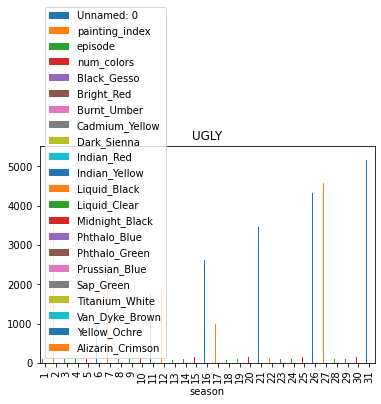

In [29]:
# we just give it the x-axis on the bar (season) and it plots bar values for everything else
# plt.show() just tells python to actually show us the graph 
gbob.plot.bar(x = 'season', title = 'UGLY')
plt.show()

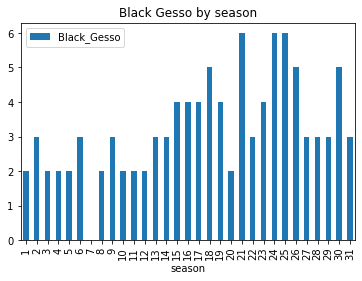

In [30]:
# to limit the plot to black gesso we just get the two columns we need
# before writing .plot.bar(...) which will create the plot

gbob.loc[:, ['Black_Gesso', 'season']].plot.bar(x = 'season', title = 'Black Gesso by season')
plt.show()

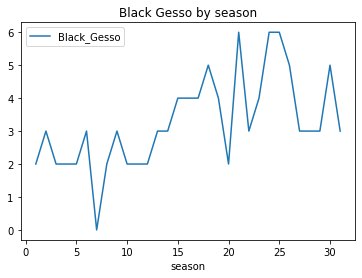

In [31]:
# hmm, maybe this would be better as a line plot
gbob.loc[:, ['Black_Gesso', 'season']].plot.line(x = 'season', title = 'Black Gesso by season')
plt.show()

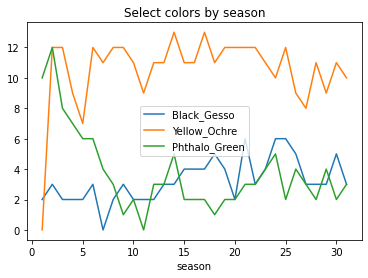

In [32]:
# let's look at several colors
gbob.loc[:, ['season', 'Black_Gesso', 'Yellow_Ochre', 'Phthalo_Green']].plot.line(x = 'season', title = 'Select colors by season')
plt.show()

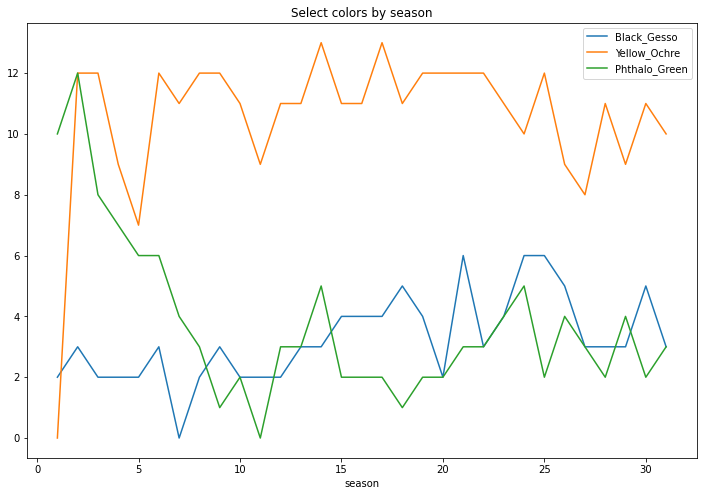

In [33]:
# we can pretty this up a bit
# first let's make it bigger and probably the legend will drop into a better place
# use the argument to plot.line() called figsize, which specifies (width, height) in inches
gbob.loc[:, 
['season', 'Black_Gesso', 'Yellow_Ochre', 'Phthalo_Green']].plot.line(
	x = 'season', title = 'Select colors by season', figsize = (12, 8))
plt.show()

214
Alizarin Crimson    #4E1500
Black Gesso         #000000
Bright Red          #DB0000
Cadmium Yellow      #FFEC00
Dark Sienna         #5F2E1F
Indian Yellow       #FFB800
Liquid Clear        #FFFFFF
Midnight Black      #000000
Phthalo Blue        #0C0040
Phthalo Green       #102E3C
Prussian Blue       #021E44
Sap Green           #0A3410
Titanium White      #FFFFFF
Van Dyke Brown      #221B15
Yellow Ochre        #C79B00
dtype: object


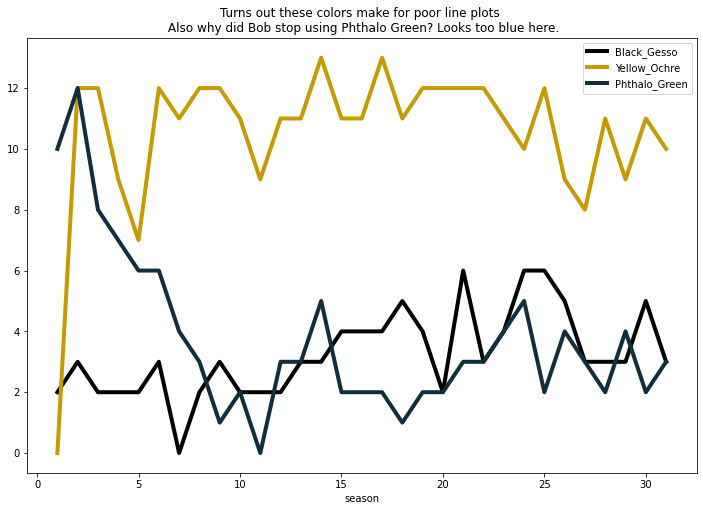

In [34]:
# Finally, let's make the colors correspond to their actual values
# For a few colors, this manual color input is a quick and simple way to do it
# Just find the hex you want using the color table I already created
# and put it as the c argument in the plot function (in the correct order)

print(get_colortable())

gbob.loc[:, 
['season', 'Black_Gesso', 'Yellow_Ochre', 'Phthalo_Green']].plot.line(
	x = 'season', 
	title = 'Turns out these colors make for poor line plots \n Also why did Bob stop using Phthalo Green? Looks too blue here.', 
	figsize = (12, 8),
	color = ['#000000', '#C79B00', '#102E3C'],
	linewidth = 4)
plt.show()

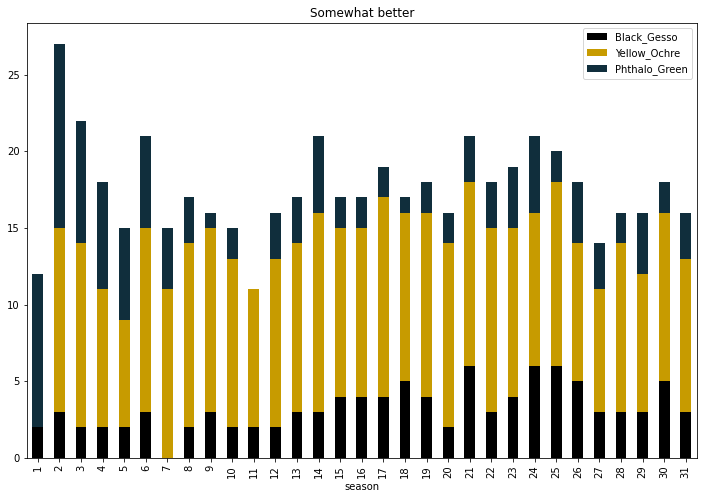

In [35]:
# Easily switch between plot types, changing plot.line to plot.bar
# stacked = True does the obvious

gbob.loc[:, 
['season', 'Black_Gesso', 'Yellow_Ochre', 'Phthalo_Green']].plot.bar(stacked = True,
	x = 'season', 
	title = 'Somewhat better', 
	figsize = (12, 8),
	color = ['#000000', '#C79B00', '#102E3C'],
	linewidth = 4)
plt.show()

## Part 6: Save your pictures!
using the function `plt.savefig`. It will interpret the file format you want to use. You will also get a printout.

**IMPORTANT**
In the code chunk below, change `/home/bb/` to be some file path on your computer. If you are using a cloud-based Jupyter service, you shouldn't run it. Just save this code for later use on your own machine.

For example, to save it as a pdf...

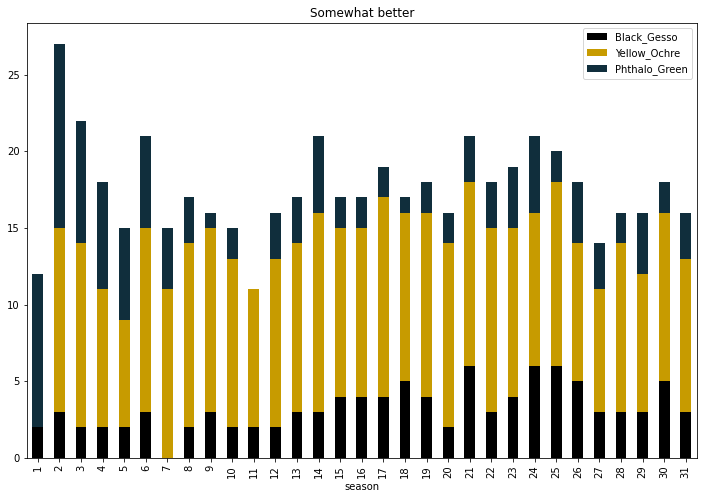

In [36]:
# after creating your plot as above, 
# **instead of plt.show()** type plt.savefig('/pathtofile/filename.pdf')
gbob.loc[:, 
['season', 'Black_Gesso', 'Yellow_Ochre', 'Phthalo_Green']].plot.bar(stacked = True,
	x = 'season', 
	title = 'Somewhat better', 
	figsize = (12, 8),
	color = ['#000000', '#C79B00', '#102E3C'],
	linewidth = 4)
plt.savefig('/home/bb/mybobplt.pdf')

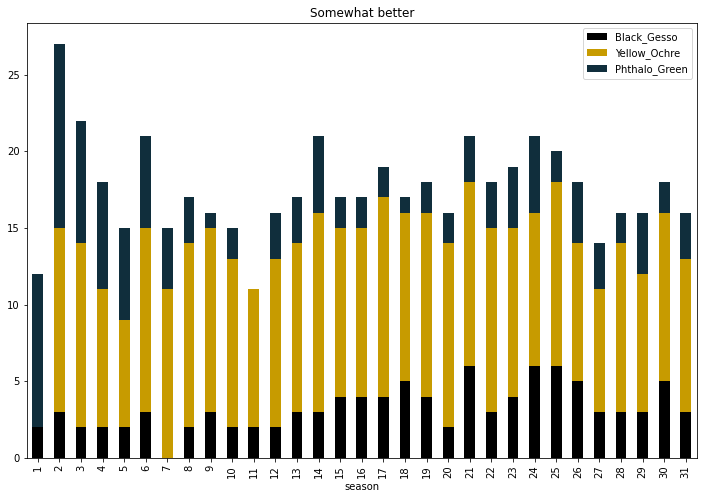

In [37]:
# to save it with a certain dpi, do
gbob.loc[:, 
['season', 'Black_Gesso', 'Yellow_Ochre', 'Phthalo_Green']].plot.bar(stacked = True,
	x = 'season', 
	title = 'Somewhat better', 
	figsize = (12, 8),
	color = ['#000000', '#C79B00', '#102E3C'],
	linewidth = 4)
plt.savefig('/home/bb/mybobplt.pdf', dpi=1200)

### Other file formats
To save as jpeg you would replace .pdf with .jpeg. To see more options for formatting your output, run (lots of output!)

`help(plt.savefig)`

## Part 7: Even more plotting
The seaborn module has many good tools. https://seaborn.pydata.org/index.html

Both seaborn and pandas plotting are based on the package matplotlib and matplotlib.pyplot. We used some of this as show by the statement import matplotlib.pyplot as plt, e.g. plt.savefig is a matplotlib.pyplot function. But the documentation for it can be very bad, and the usage can be difficult.


### PS: Installing modules
To install a module from Jupyter, do 

- File > New > Console  to open a console where you can type python commands interactively
- pip install package name, e.g. pip install seaborn
- or conda install package name, e.g. conda install seaborn


`pip` and `conda` are two python utilities that handle package management --- dependencies on other packages needed for them to work, updates to new versions etc. If you have the Anaconda Navigator, you can also install packages from there.

To learn more about package management see, for example, 

- (pip) https://en.wikipedia.org/wiki/Pip_(package_manager)#Command-line_interface
- (Conda) https://conda.io/projects/conda/en/latest/user-guide/concepts/installing-with-conda.html
- (Anaconda) https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/


### PPS: Help for any function
`help(my_function)` will give you a possibly large help file for the function `my_function`, for example `help(plt.savefig)` shows all the options you have for saving plots to files using that function.

## Lagniappe for-loop: Every demo should have a little something extra
For those who want to dip a toe into further programming. A 'for' loop is a common task in all programming languages. 

It tells the computer:

- for each item in a sequence
- do something

In [38]:
# for example, here is a loop telling python to print each item in the given list
# i is a dummy variable that stands in for a given item in the list at each iteration

for i in [1, 2, 3]:
	print(i)

1
2
3


In [39]:
# the dummy variable name is not important
for weirdname in [1, 2, 3]:
	print(weirdname)

1
2
3


<PandasArray>
['Ebony Sunset', 'Winter Mist', 'Quiet Stream']
Length: 3, dtype: object


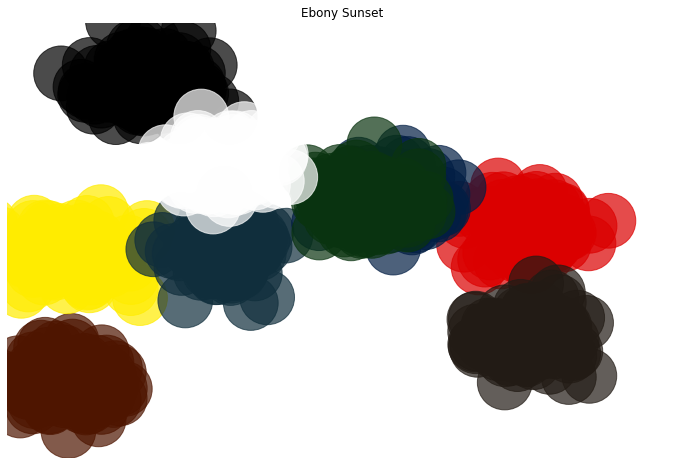

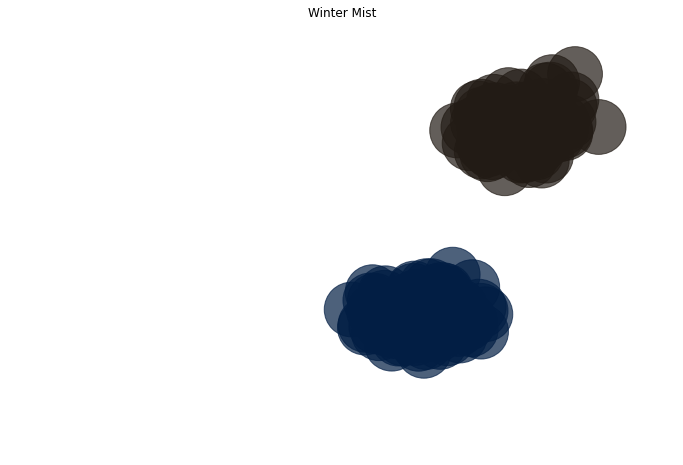

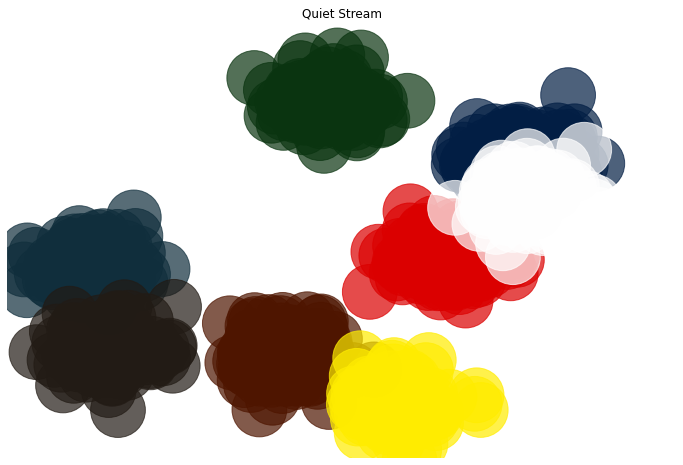

In [41]:
# For loops are more useful than those examples suggest
# Let's use this to plot the painting palette cloud for a range of paintings
painting = get_painting_names()
print(painting[2:5])

for p in painting[2:5]:
	plot_cloud(p)